In [145]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, GRU


In [146]:
#2. Read data
import yfinance as yf

data = yf.download(tickers = "GC=F", start="2017-12-01", end="2023-06-11", interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,1274.099976,1288.599976,1271.000000,1278.800049,1278.800049,823
2017-12-04,1272.500000,1276.099976,1270.300049,1274.300049,1274.300049,850
2017-12-05,1275.400024,1275.800049,1260.000000,1261.599976,1261.599976,1499
2017-12-06,1264.900024,1267.800049,1261.599976,1262.800049,1262.800049,373
2017-12-07,1262.300049,1262.400024,1243.900024,1249.800049,1249.800049,358
...,...,...,...,...,...,...
2023-06-05,1947.500000,1961.900024,1937.800049,1958.000000,1958.000000,713
2023-06-06,1960.800049,1965.500000,1958.800049,1965.500000,1965.500000,164
2023-06-07,1959.000000,1968.400024,1940.699951,1942.699951,1942.699951,139


In [147]:
data = data.reset_index('Date', inplace=False)

# Descriptive Statistical

In [148]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000
mean,1628.017770,1635.762447,1620.466619,1628.147625,1628.147625,5326.265468
std,255.240878,257.853349,252.811910,255.355105,255.355105,30228.925068
min,1173.199951,1180.199951,1161.400024,1176.199951,1176.199951,0.000000
25%,1332.850037,1339.049957,1327.174988,1333.100006,1333.100006,50.000000
50%,1726.250000,1733.549988,1717.500000,1724.850037,1724.850037,193.000000
75%,1833.275024,1842.074982,1824.800018,1834.275024,1834.275024,600.750000
max,2053.600098,2072.000000,2040.000000,2051.500000,2051.500000,386334.000000


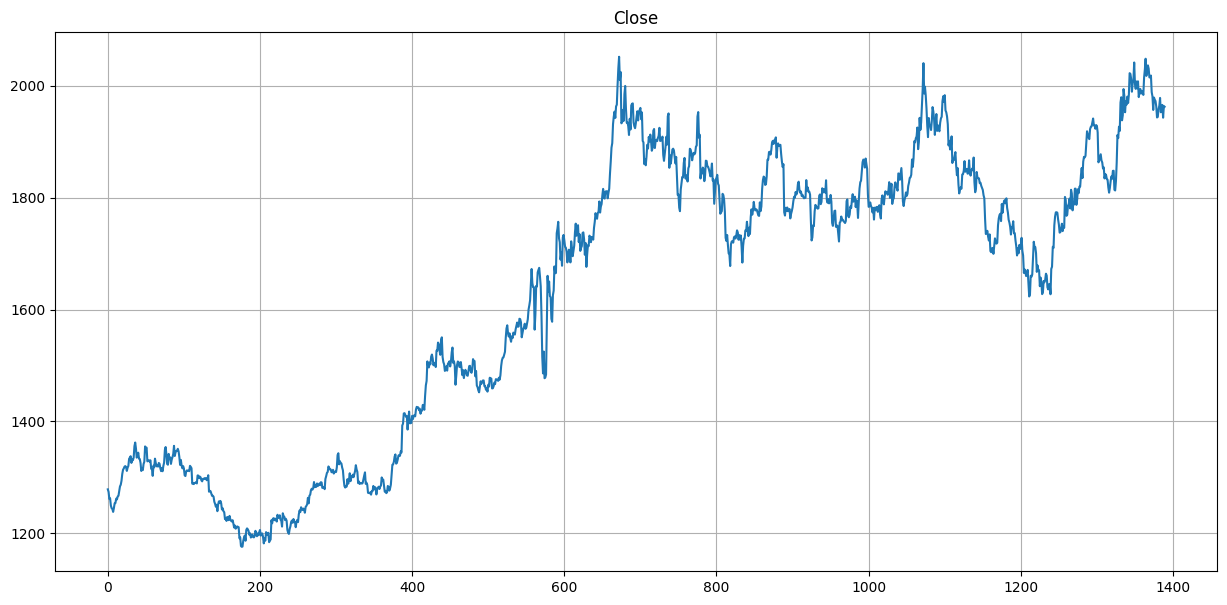

In [149]:
plt.figure(figsize=(15, 7))
plt.plot(data['Close'])
plt.title('Close')
plt.grid(True)
plt.show()

# 7:2:1

## Linear Regression

In [150]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [151]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [152]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [153]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [154]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data1 = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[2261.40253009 2262.20138875 2263.0002474  2263.79910606 2264.59796472
 2265.39682337 2266.19568203]


In [155]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2261.40253009 2262.20138875 2263.0002474  2263.79910606 2264.59796472
 2265.39682337 2266.19568203 2266.99454068 2267.79339934 2268.59225799
 2269.39111665 2270.1899753  2270.98883396 2271.78769262 2272.58655127
 2273.38540993 2274.18426858 2274.98312724 2275.78198589 2276.58084455
 2277.3797032  2278.17856186 2278.97742052 2279.77627917 2280.57513783
 2281.37399648 2282.17285514 2282.97171379 2283.77057245 2284.5694311 ]


In [156]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 271.49228239063734
Validation RMSE: 308.24996591795156
Testing MAE: 236.336535949348
Validation MAE: 302.1115663071152
Testing MAPE: 0.13483060261285834
Validation MAPE: 0.16049057972908795


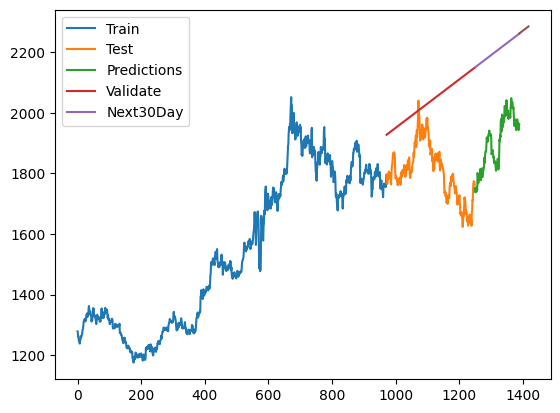

In [157]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

## Gated Recurrent Unit (GRU)

In [158]:
df = data

In [159]:
df1=df.reset_index()['Close']

In [160]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [161]:
#Split train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [162]:
#Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [163]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [164]:
#Reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [165]:
#Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [166]:
#Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 5s 127ms/step - loss: 0.1306 - val_loss: 0.0065
Epoch 2/100
14/14 [==============================] - 1s 65ms/step - loss: 0.0213 - val_loss: 0.0017
Epoch 3/100
14/14 [==============================] - 1s 64ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 4/100
14/14 [==============================] - 1s 66ms/step - loss: 0.0046 - val_loss: 0.0010
Epoch 5/100
14/14 [==============================] - 1s 67ms/step - loss: 0.0020 - val_loss: 9.8927e-04
Epoch 6/100
14/14 [==============================] - 1s 65ms/step - loss: 9.0550e-04 - val_loss: 9.0545e-04
Epoch 7/100
14/14 [==============================] - 1s 64ms/step - loss: 7.3453e-04 - val_loss: 8.6811e-04
Epoch 8/100
14/14 [==============================] - 1s 64ms/step - loss: 7.2287e-04 - val_loss: 9.1605e-04
Epoch 9/100
14/14 [==============================] - 1s 65ms/step - loss: 7.0375e-04 - val_loss: 8.1828e-04
Epoch 10/100
14/14 [==============================] - 1s 63ms/s

In [167]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 13ms/step


In [168]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [169]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [170]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 19.42636430363636
Validation RMSE: 15.708265330180822
Testing MAE: 15.333996099267308
Validation MAE: 12.623037484975967
Testing MAPE: 0.008588338446343723
Validation MAPE: 0.006349868924283263


In [171]:
#Predict 7 days after
x_input=val_data[41:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output1=[]
n_steps=100
i=0

while i < 7:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output1.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output1.extend(yhat.tolist())
        i += 1

[0.27179343]
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.898

In [172]:
scaler.inverse_transform(lst_output1)

array([[1414.10074942],
       [1579.26774736],
       [1579.43688882],
       [1586.06643049],
       [1591.37409149],
       [1596.74832391],
       [1602.23404777]])

In [173]:
#Predict 30 days after
x_input=val_data[41:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

[0.27179343]
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.898

In [174]:
scaler.inverse_transform(lst_output)

array([[1414.10074942],
       [1579.26774736],
       [1579.43688882],
       [1586.06643049],
       [1591.37409149],
       [1596.74832391],
       [1602.23404777],
       [1607.81248119],
       [1613.45654692],
       [1619.14521967],
       [1624.86164789],
       [1630.59430159],
       [1636.33384199],
       [1642.07541709],
       [1647.81417491],
       [1653.54672426],
       [1659.26993484],
       [1664.98177193],
       [1670.68040952],
       [1676.36433462],
       [1682.03177338],
       [1687.68204758],
       [1693.31333118],
       [1698.92494596],
       [1704.51522241],
       [1710.0831171 ],
       [1715.62748223],
       [1721.14722221],
       [1726.64124142],
       [1732.10797469]])

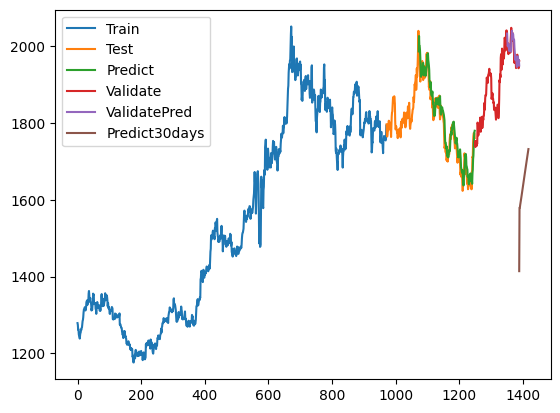

In [175]:
#Plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Autoregressive Integrated Moving Average (ARIMA)

In [176]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

#Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [177]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
#Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

#Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8134.194, Time=3.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8132.040, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8133.785, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8133.796, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8131.119, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8135.591, Time=0.65 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.465 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [179]:
#Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [180]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(n_periods=len(x_next_7_days))

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[1793.69995117 1793.69995117 1793.69995117 1793.69995117 1793.69995117
 1793.69995117 1793.69995117]


In [181]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1793.69995117 1793.69995117 1793.69995117 1793.69995117 1793.69995117
 1793.69995117 1793.69995117 1793.69995117 1793.69995117 1793.69995117
 1793.69995117 1793.69995117 1793.69995117 1793.69995117 1793.69995117
 1793.69995117 1793.69995117 1793.69995117 1793.69995117 1793.69995117
 1793.69995117 1793.69995117 1793.69995117 1793.69995117 1793.69995117
 1793.69995117 1793.69995117 1793.69995117 1793.69995117 1793.69995117]


In [182]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 88.65825337874824
Validation RMSE: 138.88026343451878
Testing MAE: 69.8946058973134
Validation MAE: 116.4043212890625
Testing MAPE: 0.03873940772712433
Validation MAPE: 0.059555481153418056


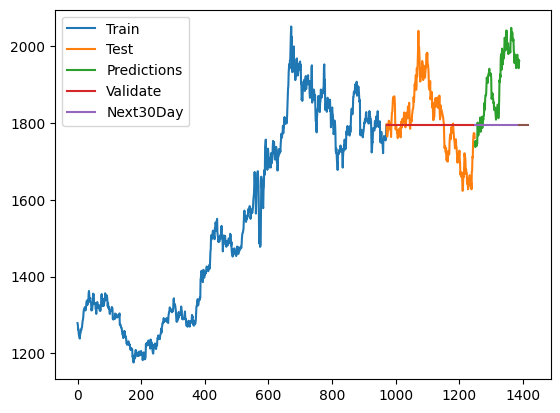

In [183]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

##Long short term memory (LSTM)

In [184]:
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

In [185]:
df1=df.reset_index()['Close']

In [186]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [187]:
#Split train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [188]:
#Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [189]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [190]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [191]:
#Define LSTM Model
# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100,1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [192]:
# Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 6s 170ms/step - loss: 0.0841 - val_loss: 0.0081
Epoch 2/100
14/14 [==============================] - 2s 162ms/step - loss: 0.0120 - val_loss: 0.0194
Epoch 3/100
14/14 [==============================] - 3s 221ms/step - loss: 0.0057 - val_loss: 0.0158
Epoch 4/100
14/14 [==============================] - 2s 135ms/step - loss: 0.0043 - val_loss: 0.0123
Epoch 5/100
14/14 [==============================] - 2s 139ms/step - loss: 0.0036 - val_loss: 0.0060
Epoch 6/100
14/14 [==============================] - 2s 135ms/step - loss: 0.0027 - val_loss: 0.0047
Epoch 7/100
14/14 [==============================] - 2s 135ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 8/100
14/14 [==============================] - 2s 157ms/step - loss: 0.0020 - val_loss: 0.0049
Epoch 9/100
14/14 [==============================] - 3s 222ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 10/100
14/14 [==============================] - 2s 137ms/step - loss: 0.0015 - val_lo

In [193]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 14ms/step


In [194]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [195]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [196]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 25.144848526640857
Validation RMSE: 17.067822089701565
Testing MAE: 20.710308527542384
Validation MAE: 13.968884590344533
Testing MAPE: 0.011689553250808876
Validation MAPE: 0.007022740260029541


In [197]:
val_data.shape

(140, 1)

In [198]:
#Predict the next 7 days
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9023013]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.

In [199]:
#Predict the next 30 days
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9023013]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.

In [200]:
scaler.inverse_transform(lst_output)

array([[1965.98433318],
       [1967.64251422],
       [1966.14987477],
       [1966.35313668],
       [1965.23170065],
       [1966.51966954],
       [1968.77605414],
       [1970.09751743],
       [1969.30001702],
       [1970.0581276 ],
       [1969.89629022],
       [1969.98539991],
       [1970.44117405],
       [1970.60702867],
       [1971.33566211],
       [1971.50198628],
       [1971.74500321],
       [1972.20954224],
       [1972.35244121],
       [1972.38583126],
       [1971.91904884],
       [1970.41743581],
       [1969.68890673],
       [1968.59632178],
       [1968.53721096],
       [1967.98397962],
       [1968.85112958],
       [1968.69800491],
       [1967.91975595],
       [1964.42919174]])

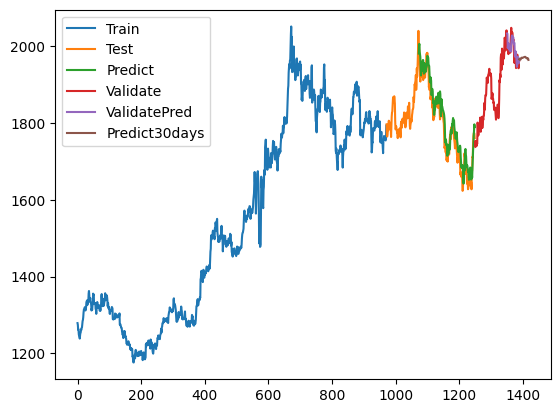

In [201]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Exponential Smoothing (ETS)

In [202]:
# 4. Split train test
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [203]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [204]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [205]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [206]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [207]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [208]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# 7. Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [209]:
y_pred = simple_exp.predict(test_data.index)

In [210]:
y_pred_val= simple_exp.predict(val_data.index)

In [211]:
#8. Predict next 7 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+7))
y_next_7_days = simple_exp.predict(fh)
y_next_7_days

array([[1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715]])

In [212]:
#9. Predict next 30 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+30))
y_next_30_days = simple_exp.predict(fh)
y_next_30_days

array([[1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715],
       [1793.1863715]])

In [213]:
# 10. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 88.7079262841049
Validation RMSE: 139.28471041249287
Testing MAE: 69.94715116876161
Validation MAE: 116.79317446904118
Testing MAPE: 0.038757610148046774
Validation MAPE: 0.059755217288376246


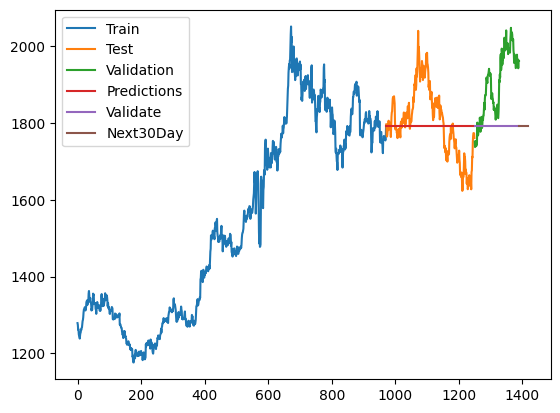

In [214]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Random Forest

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [217]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [218]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [219]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [220]:
y_pred = model.predict(x_test)

In [221]:
y_pred_val =  model.predict(x_val)

In [222]:
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766
 1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766
 1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766
 1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766
 1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766
 1785.19667766 1785.19667766 1785.19667766 1785.19667766 1785.19667766]


In [223]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 89.85597006363008
Validation RMSE: 145.665245517711
Testing MAE: 71.11033068995056
Validation MAE: 123.02703572336377
Testing MAPE: 0.03923383922951354
Validation MAPE: 0.06296564801521577


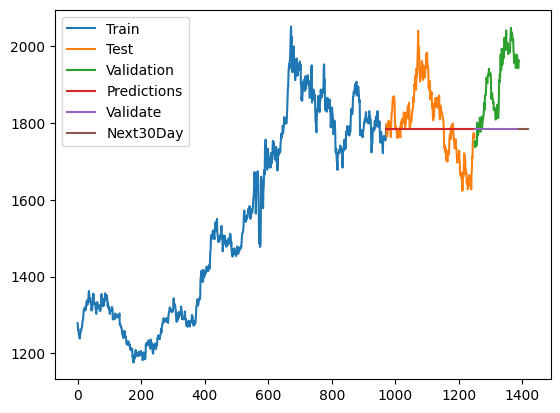

In [224]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Bayesian Neural Networks (BNN)

In [225]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [226]:
train_dates = train_data.index.values
test_dates = test_data.index.values
val_dates = val_data.index.values
train_close_prices = train_data['Close'].values
val_close_prices = val_data['Close'].values
test_close_prices = test_data['Close'].values

In [227]:
import torch
import torch.nn as nn

In [228]:
X_train = torch.from_numpy(train_dates.reshape(-1, 1)).float()
y_train = torch.from_numpy(train_close_prices.reshape(-1, 1)).float()
X_test = torch.from_numpy(test_dates.reshape(-1, 1)).float()
y_test = torch.from_numpy(test_close_prices.reshape(-1, 1)).float()
X_val = torch.from_numpy(val_dates.reshape(-1, 1)).float()
y_val = torch.from_numpy(val_close_prices.reshape(-1, 1)).float()

In [229]:
# Determining the architecture of a Bayesian Neural Network.
class BNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(BNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [230]:
# Determining the loss function and optimization algorithm.
criterion = nn.MSELoss()
learning_rate = 0.001
num_epochs = 1000

In [231]:
# Built model BNN
model = BNN(input_size=1, output_size=1)

In [232]:
# Train model BNN
for epoch in range(num_epochs):
    model.train()

    # Tính đầu ra dự đoán của mô hình
    y_pred = model(X_train)

    # Tính lỗi dự đoán so với giá thực tế
    loss = criterion(y_pred, y_train)

    # Backpropagation và cập nhật trọng số
    loss.backward()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 723599.25
Epoch [200/1000], Loss: 1538704.875
Epoch [300/1000], Loss: 863992.75
Epoch [400/1000], Loss: 877720.5
Epoch [500/1000], Loss: 414332.0625
Epoch [600/1000], Loss: 470059.84375
Epoch [700/1000], Loss: 740713.875
Epoch [800/1000], Loss: 485235.40625
Epoch [900/1000], Loss: 722199.4375
Epoch [1000/1000], Loss: 356577.1875


In [233]:
# Test
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)

In [234]:
# Validation
model.eval()
with torch.no_grad():
    y_pred_val = model(X_val)

In [235]:
y_test = np.array(test_data['Close'])
y_val = np.array(val_data['Close'])

In [236]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = torch.sqrt(torch.mean((y_pred_test - y_test)**2))
valid_rmse = torch.sqrt(torch.mean((y_pred_val - y_val)**2))
#test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse.item())

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred_test)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 789.9389396836524
Validation RMSE: 1149.736526494448
Testing MAE: 762.980264128541
Validation MAE: 1142.7622384207589
Testing MAPE: 0.4296352038132862
Validation MAPE: 0.6019329671813088


In [237]:
# Predict the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

x_next_7_days = torch.from_numpy(np.array(range(last_index+1, last_index+8)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_7_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_7_days)):
    print(f'{y_pred_next[i]}')

3207.894775390625
3210.19482421875
3212.495361328125
3214.795166015625
3217.09521484375
3219.395751953125
3221.69580078125


In [238]:
# Predict the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = torch.from_numpy(np.array(range(last_index+1, last_index+31)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_30_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_30_days)):
    print(f'{y_pred_next[i]}')

3207.894775390625
3210.19482421875
3212.495361328125
3214.795166015625
3217.09521484375
3219.395751953125
3221.69580078125
3223.995849609375
3226.295654296875
3228.59619140625
3230.896240234375
3233.196533203125
3235.49658203125
3237.796875
3240.09716796875
3242.397216796875
3244.697509765625
3246.997314453125
3249.297607421875
3251.59765625
3253.897705078125
3256.197998046875
3258.498291015625
3260.79833984375
3263.098388671875
3265.398681640625
3267.69873046875
3269.9990234375
3272.298828125
3274.599365234375


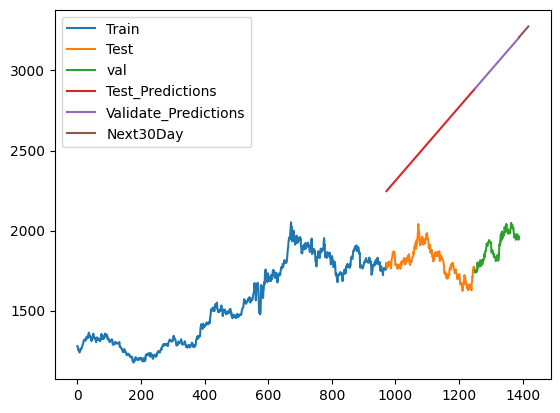

In [239]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data, y_pred_next)
plt.legend(['Train', 'Test','val', 'Test_Predictions','Validate_Predictions','Next30Day'])
plt.show()

## Gaussian Process Regression (GPR)

In [240]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [241]:
# Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [242]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [243]:
# Choose best kernel
kernels = [RBF(), Matern(), RationalQuadratic(), ExpSineSquared(), DotProduct()]
param_grid = {'kernel': kernels}

gpr = GaussianProcessRegressor()
grid_search = GridSearchCV(gpr, param_grid, cv=KFold(n_splits=5))

grid_search.fit(x_train, y_train)


print("Best Kernel:", grid_search.best_estimator_.kernel)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 

Best Kernel: RationalQuadratic(alpha=1, length_scale=1)
Best Score: -4.347299211336489


In [244]:
# Built model GPR
kernel = RationalQuadratic(alpha=1, length_scale=1)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

In [245]:
gpr.fit(x_train, y_train)

GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1),
                         random_state=42)

In [246]:
y_pred = gpr.predict(x_test)

In [247]:
y_pred_val =  gpr.predict(x_val)

In [248]:
# 12. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 235.49353348839372
Validation RMSE: 433.37455798675273
Testing MAE: 219.16395715446455
Validation MAE: 422.4915145491856
Testing MAPE: 0.1201741497678759
Validation MAPE: 0.22016223368823504


In [249]:
# Predict the next 7 days
last_index =  data.index[-1]
# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = gpr.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[1459.9053097  1459.64420699 1459.38365724 1459.12365822 1458.86420774
 1458.60530359 1458.34694361]


In [250]:
# Predict the next 30 days
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = gpr.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1459.9053097  1459.64420699 1459.38365724 1459.12365822 1458.86420774
 1458.60530359 1458.34694361 1458.08912563 1457.83184749 1457.57510706
 1457.31890221 1457.06323083 1456.80809081 1456.55348007 1456.29939653
 1456.04583812 1455.7928028  1455.54028851 1455.28829325 1455.03681497
 1454.78585169 1454.53540141 1454.28546215 1454.03603193 1453.78710879
 1453.5386908  1453.290776   1453.04336248 1452.79644833 1452.55003163]


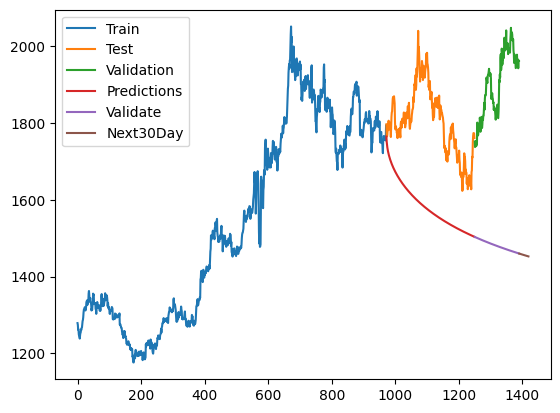

In [251]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Recurrent Neural Network (RNN)

In [252]:
df1=df.reset_index()['Close']

In [253]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [254]:
# Split train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [255]:
# Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [256]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [257]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [258]:
from keras.layers import Dense, SimpleRNN

In [259]:
# 8. Define RNN Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [260]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 2s 41ms/step - loss: 0.0596 - val_loss: 0.0033
Epoch 2/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 3/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 4/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 5/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 6/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/100
14/14 [==============================] - 1s 41ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 8/100
14/14 [==============================] - 1s 44ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 9/100
14/14 [==============================] - 1s 44ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 10/100
14/14 [==============================] - 1s 43ms/step - loss: 0.0012 - val_loss: 0.0016

In [261]:
# Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 22ms/step


In [262]:
# Chuẩn hóa dữ liệu y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [263]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [264]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 19.06241859166212
Validation RMSE: 17.889979616810205
Testing MAE: 14.802600580420203
Validation MAE: 14.718358748998416
Testing MAPE: 0.008287697077624489
Validation MAPE: 0.00738590901650589


In [265]:
# Predict the next 7 days
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.88910604]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0

In [266]:
scaler.inverse_transform(lst_output)

array([[1954.43450722],
       [1956.94836039],
       [1953.01193471],
       [1947.52328921],
       [1947.16914602],
       [1943.39163609],
       [1940.49155399]])

In [267]:
# Predict the next 30 days
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.88910604]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0

In [268]:
scaler.inverse_transform(lst_output)

array([[1954.43450722],
       [1956.94836039],
       [1953.01193471],
       [1947.52328921],
       [1947.16914602],
       [1943.39163609],
       [1940.49155399],
       [1938.44573538],
       [1936.57641446],
       [1930.92687068],
       [1929.11786054],
       [1924.93982656],
       [1920.74327154],
       [1921.09298011],
       [1917.82612921],
       [1914.28725377],
       [1913.15355733],
       [1908.59049437],
       [1907.11726289],
       [1907.0037889 ],
       [1904.37354012],
       [1902.37780658],
       [1901.2177633 ],
       [1899.31515668],
       [1898.19773789],
       [1898.11754961],
       [1897.86430697],
       [1896.82869379],
       [1896.51931414],
       [1895.049526  ]])

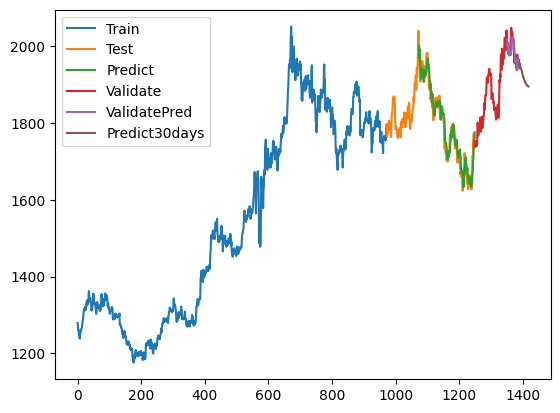

In [269]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

# 6:2:2

## Linear Regression

In [270]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [271]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [272]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [273]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [274]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data1 = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[2378.57474551 2379.48132224 2380.38789897 2381.29447569 2382.20105242
 2383.10762915 2384.01420588]


In [275]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2378.57474551 2379.48132224 2380.38789897 2381.29447569 2382.20105242
 2383.10762915 2384.01420588 2384.9207826  2385.82735933 2386.73393606
 2387.64051278 2388.54708951 2389.45366624 2390.36024297 2391.26681969
 2392.17339642 2393.07997315 2393.98654987 2394.8931266  2395.79970333
 2396.70628006 2397.61285678 2398.51943351 2399.42601024 2400.33258696
 2401.23916369 2402.14574042 2403.05231714 2403.95889387 2404.8654706 ]


In [276]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 185.20900129106977
Validation RMSE: 434.51765128739424
Testing MAE: 173.41062040524665
Validation MAE: 426.10441421063615
Testing MAPE: 0.09552462249436974
Validation MAPE: 0.23639117214727107


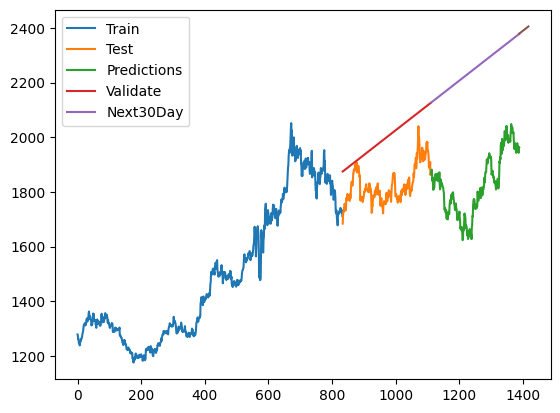

In [277]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

## Gated Recurrent Unit (GRU)

In [278]:
df = data

In [279]:
df1=df.reset_index()['Close']

In [280]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [281]:
#Split train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [282]:
#Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [283]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [284]:
#Reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [285]:
#Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [286]:
#Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 105ms/step - loss: 0.0507 - val_loss: 0.0039
Epoch 2/100
12/12 [==============================] - 1s 65ms/step - loss: 0.0140 - val_loss: 0.0067
Epoch 3/100
12/12 [==============================] - 1s 62ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch 4/100
12/12 [==============================] - 1s 63ms/step - loss: 0.0018 - val_loss: 9.0300e-04
Epoch 5/100
12/12 [==============================] - 1s 63ms/step - loss: 9.1752e-04 - val_loss: 9.3988e-04
Epoch 6/100
12/12 [==============================] - 1s 62ms/step - loss: 6.8918e-04 - val_loss: 7.4990e-04
Epoch 7/100
12/12 [==============================] - 1s 64ms/step - loss: 6.5849e-04 - val_loss: 6.3288e-04
Epoch 8/100
12/12 [==============================] - 1s 100ms/step - loss: 6.2770e-04 - val_loss: 6.1606e-04
Epoch 9/100
12/12 [==============================] - 1s 103ms/step - loss: 6.2542e-04 - val_loss: 6.1860e-04
Epoch 10/100
12/12 [==============================] -

In [287]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 13ms/step


In [288]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [289]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [290]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 19.613922911159918
Validation RMSE: 21.311218999170706
Testing MAE: 15.56132412495586
Validation MAE: 16.66905152056849
Testing MAPE: 0.008396116377645759
Validation MAPE: 0.008951405471937972


In [291]:
#Predict 7 days after
x_input=val_data[179:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output1=[]
n_steps=100
i=0

while i < 7:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output1.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output1.extend(yhat.tolist())
        i += 1

[0.226437]
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.89866

In [292]:
scaler.inverse_transform(lst_output1)

array([[1374.40027045],
       [1517.31890616],
       [1524.28999149],
       [1528.26006808],
       [1530.76854754],
       [1531.83768119],
       [1532.06147276]])

In [293]:
#Predict 30 days after
x_input=val_data[179:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

[0.226437]
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.89866

In [294]:
scaler.inverse_transform(lst_output)

array([[1374.40027045],
       [1517.31890616],
       [1524.28999149],
       [1528.26006808],
       [1530.76854754],
       [1531.83768119],
       [1532.06147276],
       [1531.77961381],
       [1531.17175844],
       [1530.34378962],
       [1529.36277439],
       [1528.2734241 ],
       [1527.10696368],
       [1525.88606182],
       [1524.62785703],
       [1523.34492273],
       [1522.0471716 ],
       [1520.7419077 ],
       [1519.43484388],
       [1518.12999736],
       [1516.83055064],
       [1515.53866885],
       [1514.25581281],
       [1512.98297378],
       [1511.72069958],
       [1510.46922496],
       [1509.22857603],
       [1507.99857017],
       [1506.77889436],
       [1505.5693399 ]])

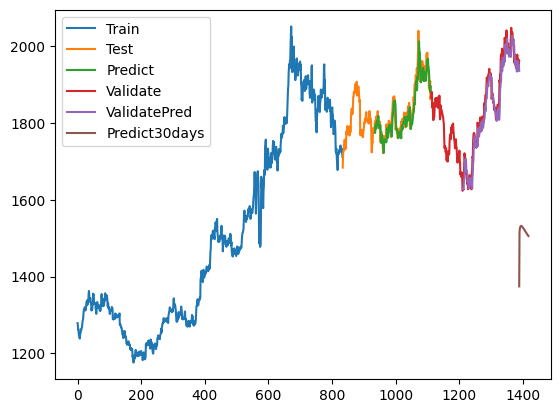

In [295]:
#Plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Autoregressive Integrated Moving Average (ARIMA)

In [296]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

#Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [297]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [298]:
#Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

#Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6977.098, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6974.628, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6976.243, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6976.277, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6973.521, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6977.526, Time=0.44 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.759 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [299]:
#Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [300]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(n_periods=len(x_next_7_days))

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559]


In [301]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559]


In [302]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 131.97267909929332
Validation RMSE: 158.8605333209298
Testing MAE: 114.7712433080879
Validation MAE: 128.56044763798337
Testing MAPE: 0.061665055377446217
Validation MAPE: 0.06780229355349136


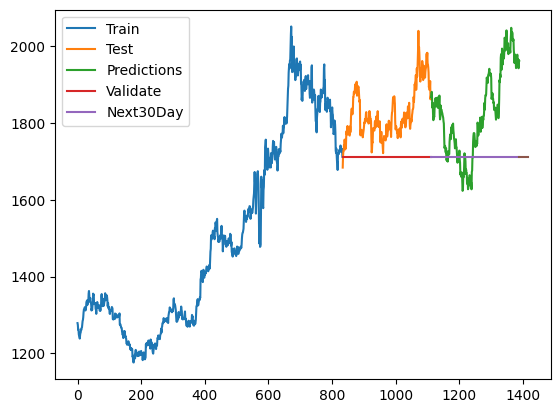

In [303]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

##Long short term memory (LSTM)

In [304]:
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

In [305]:
df1=df.reset_index()['Close']

In [306]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [307]:
#Split train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [308]:
#Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [309]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [310]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [311]:
#Define LSTM Model
# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100,1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [312]:
# Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 219ms/step - loss: 0.0989 - val_loss: 0.0514
Epoch 2/100
12/12 [==============================] - 2s 135ms/step - loss: 0.0153 - val_loss: 0.0178
Epoch 3/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0081 - val_loss: 0.0034
Epoch 4/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 5/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 6/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 7/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 8/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 9/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 10/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0020 - val_lo

In [313]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 19ms/step


In [314]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [315]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [316]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 26.64141271959798
Validation RMSE: 30.991241438398802
Testing MAE: 21.888756013859457
Validation MAE: 24.96098508673199
Testing MAPE: 0.011809262120308523
Validation MAPE: 0.013219487673347144


In [317]:
val_data.shape

(278, 1)

In [318]:
#Predict the next 7 days
x_input=val_data[178:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.8642758]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.

In [319]:
scaler.inverse_transform(lst_output)

array([[1932.70061258],
       [1920.08940051],
       [1898.57421067],
       [1882.48761642],
       [1863.71338424],
       [1854.59915353],
       [1845.06024316]])

In [320]:
#Predict the next 30 days
x_input=val_data[178:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.8642758]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.

In [321]:
scaler.inverse_transform(lst_output)

array([[1932.70061258],
       [1920.08940051],
       [1898.57421067],
       [1882.48761642],
       [1863.71338424],
       [1854.59915353],
       [1845.06024316],
       [1836.74413891],
       [1827.24070547],
       [1819.30076097],
       [1808.32644378],
       [1798.66456412],
       [1785.92761765],
       [1775.92588993],
       [1763.61539696],
       [1754.1078941 ],
       [1742.86572613],
       [1734.52729229],
       [1724.4116732 ],
       [1716.50684042],
       [1706.84965624],
       [1698.4877972 ],
       [1688.62088179],
       [1680.42174705],
       [1671.32233317],
       [1663.91532513],
       [1656.27839531],
       [1650.09069788],
       [1643.4827554 ],
       [1637.08746578]])

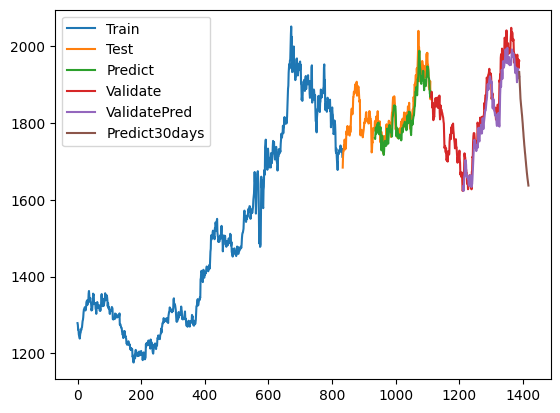

In [322]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Exponential Smoothing (ETS)

In [323]:
# 4. Split train test
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [324]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [325]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [326]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [327]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [328]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [329]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# 7. Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [330]:
y_pred = simple_exp.predict(test_data.index)

In [331]:
y_pred_val= simple_exp.predict(val_data.index)

In [332]:
#8. Predict next 7 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+7))
y_next_7_days = simple_exp.predict(fh)
y_next_7_days

array([[1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942]])

In [333]:
#9. Predict next 30 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+30))
y_next_30_days = simple_exp.predict(fh)
y_next_30_days

array([[1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942],
       [1712.47036942]])

In [334]:
# 10. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 131.6512604853862
Validation RMSE: 158.59517134213309
Testing MAE: 114.40351417706418
Validation MAE: 128.32328899551158
Testing MAPE: 0.06146361341751227
Validation MAPE: 0.06767844267213328


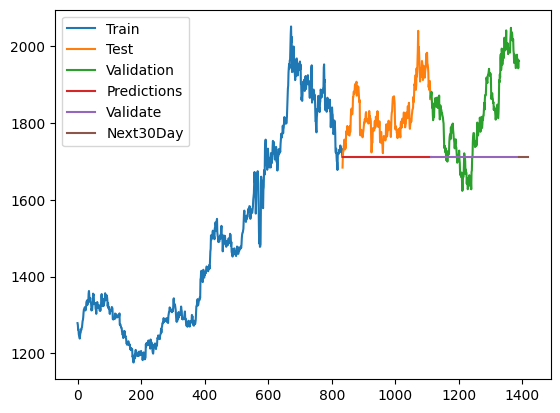

In [335]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Random Forest

In [336]:
from sklearn.ensemble import RandomForestRegressor

In [337]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [338]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [339]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [340]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [341]:
y_pred = model.predict(x_test)

In [342]:
y_pred_val =  model.predict(x_val)

In [343]:
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1726.90684872 1726.90684872 1726.90684872 1726.90684872 1726.90684872
 1726.90684872 1726.90684872 1726.90684872 1726.90684872 1726.90684872
 1726.90684872 1726.90684872 1726.90684872 1726.90684872 1726.90684872
 1726.90684872 1726.90684872 1726.90684872 1726.90684872 1726.90684872
 1726.90684872 1726.90684872 1726.90684872 1726.90684872 1726.90684872
 1726.90684872 1726.90684872 1726.90684872 1726.90684872 1726.90684872]


In [344]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 119.34501665442284
Validation RMSE: 148.60289664405863
Testing MAE: 100.23224207658602
Validation MAE: 119.71769134833166
Testing MAPE: 0.053706156630100116
Validation MAPE: 0.06322284995796557


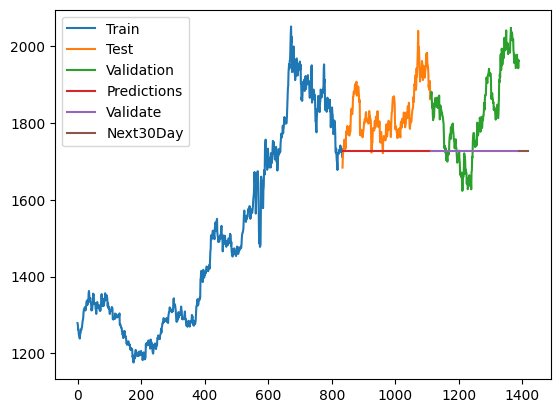

In [345]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Bayesian Neural Networks (BNN)

In [346]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [347]:
train_dates = train_data.index.values
test_dates = test_data.index.values
val_dates = val_data.index.values
train_close_prices = train_data['Close'].values
val_close_prices = val_data['Close'].values
test_close_prices = test_data['Close'].values

In [348]:
import torch
import torch.nn as nn

In [349]:
X_train = torch.from_numpy(train_dates.reshape(-1, 1)).float()
y_train = torch.from_numpy(train_close_prices.reshape(-1, 1)).float()
X_test = torch.from_numpy(test_dates.reshape(-1, 1)).float()
y_test = torch.from_numpy(test_close_prices.reshape(-1, 1)).float()
X_val = torch.from_numpy(val_dates.reshape(-1, 1)).float()
y_val = torch.from_numpy(val_close_prices.reshape(-1, 1)).float()

In [350]:
# Determining the architecture of a Bayesian Neural Network.
class BNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(BNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [351]:
# Determining the loss function and optimization algorithm.
criterion = nn.MSELoss()
learning_rate = 0.001
num_epochs = 1000

In [352]:
# Built model BNN
model = BNN(input_size=1, output_size=1)

In [353]:
# Train model BNN
for epoch in range(num_epochs):
    model.train()

    # Tính đầu ra dự đoán của mô hình
    y_pred = model(X_train)

    # Tính lỗi dự đoán so với giá thực tế
    loss = criterion(y_pred, y_train)

    # Backpropagation và cập nhật trọng số
    loss.backward()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 349809.1875
Epoch [200/1000], Loss: 417990.40625
Epoch [300/1000], Loss: 1010819.8125
Epoch [400/1000], Loss: 355441.125
Epoch [500/1000], Loss: 730169.3125
Epoch [600/1000], Loss: 413426.0
Epoch [700/1000], Loss: 764922.625
Epoch [800/1000], Loss: 604689.0
Epoch [900/1000], Loss: 322584.625
Epoch [1000/1000], Loss: 602511.5625


In [354]:
# Test
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)

In [355]:
# Validation
model.eval()
with torch.no_grad():
    y_pred_val = model(X_val)

In [356]:
y_test = np.array(test_data['Close'])
y_val = np.array(val_data['Close'])

In [357]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = torch.sqrt(torch.mean((y_pred_test - y_test)**2))
valid_rmse = torch.sqrt(torch.mean((y_pred_val - y_val)**2))
#test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse.item())

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred_test)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 177.49359074483013
Validation RMSE: 451.10885495064184
Testing MAE: 107.73826851604653
Validation MAE: 413.2971700764389
Testing MAPE: 0.05924598532471018
Validation MAPE: 0.22791165993179496


In [358]:
# Predict the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

x_next_7_days = torch.from_numpy(np.array(range(last_index+1, last_index+8)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_7_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_7_days)):
    print(f'{y_pred_next[i]}')

2487.710693359375
2489.491455078125
2491.272216796875
2493.052978515625
2494.833740234375
2496.6142578125
2498.395263671875


In [359]:
# Predict the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = torch.from_numpy(np.array(range(last_index+1, last_index+31)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_30_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_30_days)):
    print(f'{y_pred_next[i]}')

2487.710693359375
2489.491455078125
2491.272216796875
2493.052978515625
2494.833740234375
2496.6142578125
2498.395263671875
2500.17578125
2501.95654296875
2503.737060546875
2505.518310546875
2507.298583984375
2509.07958984375
2510.8603515625
2512.640869140625
2514.421630859375
2516.202392578125
2517.983154296875
2519.763916015625
2521.54443359375
2523.3251953125
2525.106201171875
2526.88623046875
2528.667236328125
2530.448486328125
2532.228759765625
2534.009521484375
2535.790283203125
2537.571044921875
2539.3515625


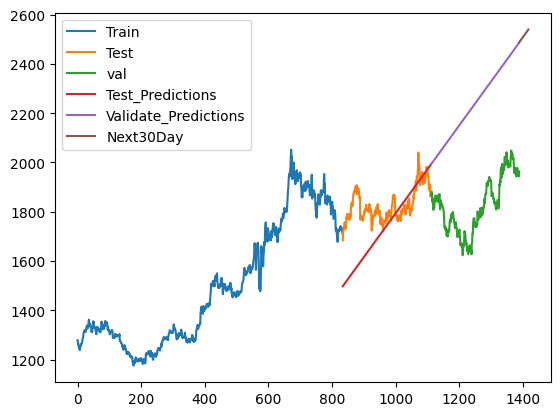

In [360]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data, y_pred_next)
plt.legend(['Train', 'Test','val', 'Test_Predictions','Validate_Predictions','Next30Day'])
plt.show()

## Gaussian Process Regression (GPR)

In [361]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [362]:
# Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [363]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [364]:
# Choose best kernel
kernels = [RBF(), Matern(), RationalQuadratic(), ExpSineSquared(), DotProduct()]
param_grid = {'kernel': kernels}

gpr = GaussianProcessRegressor()
grid_search = GridSearchCV(gpr, param_grid, cv=KFold(n_splits=5))

grid_search.fit(x_train, y_train)


print("Best Kernel:", grid_search.best_estimator_.kernel)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/

Best Kernel: RationalQuadratic(alpha=1, length_scale=1)
Best Score: -3.339262243509468


In [365]:
# Built model GPR
kernel = RationalQuadratic(alpha=1, length_scale=1)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

In [366]:
gpr.fit(x_train, y_train)

GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1),
                         random_state=42)

In [367]:
y_pred = gpr.predict(x_test)

In [368]:
y_pred_val =  gpr.predict(x_val)

In [369]:
# 12. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 298.48154853553575
Validation RMSE: 422.50739430141914
Testing MAE: 277.3029003322749
Validation MAE: 403.5671645341042
Testing MAPE: 0.15016492389293942
Validation MAPE: 0.21773233007806578


In [370]:
# Predict the next 7 days
last_index =  data.index[-1]
# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = gpr.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[1387.71731658 1387.51315754 1387.30936066 1387.10592475 1386.90284863
 1386.7001311  1386.49777098]


In [371]:
# Predict the next 30 days
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = gpr.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1387.71731658 1387.51315754 1387.30936066 1387.10592475 1386.90284863
 1386.7001311  1386.49777098 1386.29576712 1386.09411833 1385.89282345
 1385.69188133 1385.49129083 1385.29105078 1385.09116006 1384.89161753
 1384.69242206 1384.49357252 1384.29506781 1384.09690679 1383.89908838
 1383.70161146 1383.50447493 1383.30767771 1383.11121871 1382.91509684
 1382.71931103 1382.52386021 1382.3287433  1382.13395926 1381.93950701]


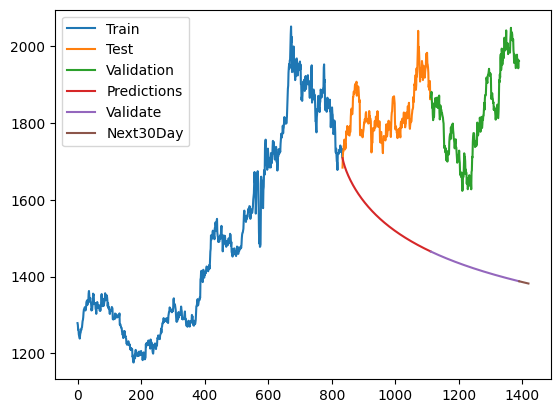

In [372]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Recurrent Neural Network (RNN)

In [373]:
df1=df.reset_index()['Close']

In [374]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [375]:
# Split train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [376]:
# Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [377]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [378]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [379]:
from keras.layers import Dense, SimpleRNN

In [380]:
# 8. Define RNN Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [381]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 46ms/step - loss: 0.0481 - val_loss: 0.0042
Epoch 2/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 3/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 4/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 5/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 7/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 8/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0014 - val_loss: 0.0014

In [382]:
# Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 9ms/step


In [383]:
# Chuẩn hóa dữ liệu y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [384]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [385]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 23.127577056659028
Validation RMSE: 27.471980180428478
Testing MAE: 18.36699508408368
Validation MAE: 21.938671737067445
Testing MAPE: 0.009902963449809612
Validation MAPE: 0.01170639169144795


In [386]:
# Predict the next 7 days
x_input=val_data[178:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.87125593]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0

In [387]:
scaler.inverse_transform(lst_output)

array([[1938.81031295],
       [1936.53817242],
       [1921.60671728],
       [1914.60529397],
       [1903.77611914],
       [1896.45853382],
       [1889.72151794]])

In [388]:
# Predict the next 30 days
x_input=val_data[178:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.87125593]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0

In [389]:
scaler.inverse_transform(lst_output)

array([[1938.81031295],
       [1936.53817242],
       [1921.60671728],
       [1914.60529397],
       [1903.77611914],
       [1896.45853382],
       [1889.72151794],
       [1880.77679389],
       [1878.46213322],
       [1869.8140067 ],
       [1862.78827125],
       [1857.25517526],
       [1845.15717864],
       [1841.77502774],
       [1834.4085573 ],
       [1826.92746509],
       [1823.8276166 ],
       [1817.21158747],
       [1812.3656482 ],
       [1808.85458041],
       [1804.98232623],
       [1802.93228168],
       [1799.25937651],
       [1796.58686845],
       [1793.23189913],
       [1789.86675628],
       [1787.3685547 ],
       [1784.07227882],
       [1781.97548821],
       [1779.54724921]])

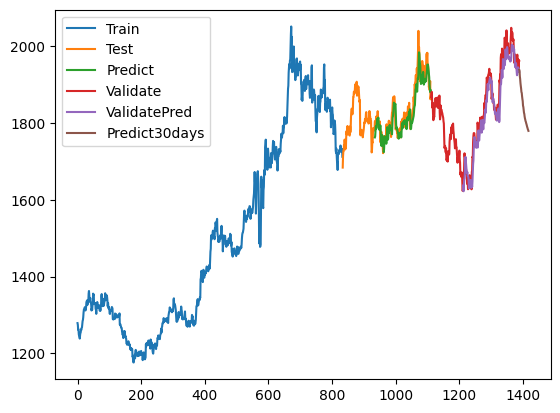

In [390]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

# 8:1:1

## Linear Regression

In [391]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [392]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [393]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [394]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [395]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data1 = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[2182.97537256 2183.69950864 2184.42364473 2185.14778081 2185.87191689
 2186.59605297 2187.32018906]


In [396]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2182.97537256 2183.69950864 2184.42364473 2185.14778081 2185.87191689
 2186.59605297 2187.32018906 2188.04432514 2188.76846122 2189.49259731
 2190.21673339 2190.94086947 2191.66500555 2192.38914164 2193.11327772
 2193.8374138  2194.56154988 2195.28568597 2196.00982205 2196.73395813
 2197.45809421 2198.1822303  2198.90636638 2199.63050246 2200.35463854
 2201.07877463 2201.80291071 2202.52704679 2203.25118287 2203.97531896]


In [397]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 299.64854785551296
Validation RMSE: 236.7236853953928
Testing MAE: 283.68344876272073
Validation MAE: 228.22757357609754
Testing MAPE: 0.16478498939162872
Validation MAPE: 0.1215516365789823


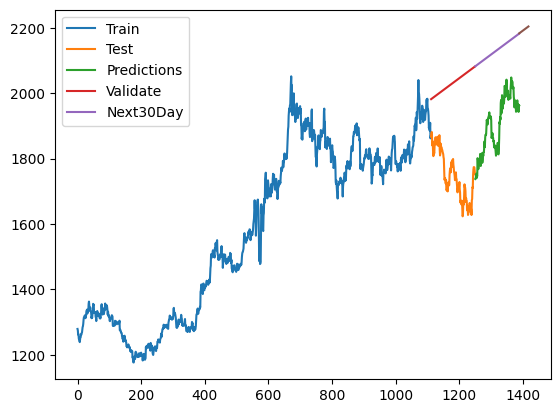

In [398]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

## Gated Recurrent Unit (GRU)

In [399]:
df = data

In [400]:
df1=df.reset_index()['Close']

In [401]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [402]:
#Split train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [403]:
#Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [404]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [405]:
#Reshape input to be [samples, time steps, features]
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [406]:
#Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [407]:
#Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 4s 90ms/step - loss: 0.1861 - val_loss: 0.0049
Epoch 2/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0249 - val_loss: 0.0027
Epoch 3/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0121 - val_loss: 0.0029
Epoch 4/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0067 - val_loss: 0.0013
Epoch 5/100
16/16 [==============================] - 1s 76ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 6/100
16/16 [==============================] - 2s 102ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
16/16 [==============================] - 1s 73ms/step - loss: 7.9224e-04 - val_loss: 0.0014
Epoch 8/100
16/16 [==============================] - 1s 58ms/step - loss: 7.8107e-04 - val_loss: 0.0013
Epoch 9/100
16/16 [==============================] - 1s 57ms/step - loss: 7.5063e-04 - val_loss: 0.0012
Epoch 10/100
16/16 [==============================] - 1s 58ms/step - loss: 7.3622e-04 -

In [408]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 15ms/step


In [409]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [410]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [411]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 20.40804015046779
Validation RMSE: 16.953519154333048
Testing MAE: 15.696529990748344
Validation MAE: 14.241371556332243
Testing MAPE: 0.00929975401420594
Validation MAPE: 0.0071424012414903456


In [412]:
#Predict 7 days after
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output1=[]
n_steps=100
i=0

while i < 7:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output1.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output1.extend(yhat.tolist())
        i += 1

[0.32017934]
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.898

In [413]:
scaler.inverse_transform(lst_output1)

array([[1456.45294593],
       [1632.90113647],
       [1622.07008344],
       [1626.2280834 ],
       [1632.06362018],
       [1636.49421856],
       [1639.9603663 ]])

In [414]:
#Predict 30 days after
x_input=val_data[40:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        padding = n_steps - len(temp_input)
        x_input = np.array(temp_input + [0] * padding)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

[0.32017934]
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0.898

In [415]:
scaler.inverse_transform(lst_output)

array([[1456.45294593],
       [1632.90113647],
       [1622.07008344],
       [1626.2280834 ],
       [1632.06362018],
       [1636.49421856],
       [1639.9603663 ],
       [1642.700124  ],
       [1644.88096362],
       [1646.63561059],
       [1648.06501764],
       [1649.24530363],
       [1650.2344316 ],
       [1651.07476517],
       [1651.80073784],
       [1652.43822687],
       [1653.00731849],
       [1653.52288168],
       [1653.99644646],
       [1654.43698639],
       [1654.85149252],
       [1655.24476467],
       [1655.62102876],
       [1655.98372815],
       [1656.33484536],
       [1656.67657162],
       [1657.0098982 ],
       [1657.3361294 ],
       [1657.6558391 ],
       [1657.97007074]])

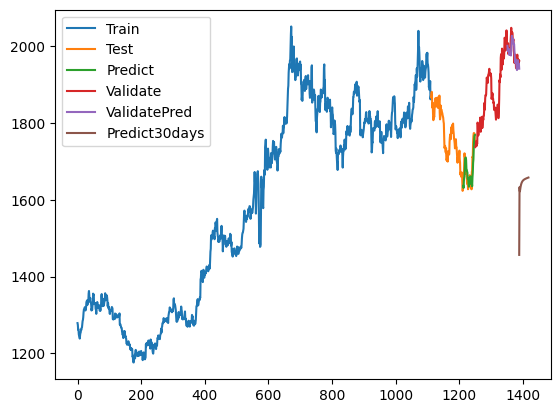

In [416]:
#Plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Autoregressive Integrated Moving Average (ARIMA)

In [417]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

#Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [418]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [419]:
#Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

#Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9345.582, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9346.958, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9346.961, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9344.775, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9348.952, Time=0.79 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.438 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [420]:
#Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

#Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [421]:
# Predict for the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(n_periods=len(x_next_7_days))

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[1868.80004883 1868.80004883 1868.80004883 1868.80004883 1868.80004883
 1868.80004883 1868.80004883]


In [422]:
# Predict for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1868.80004883 1868.80004883 1868.80004883 1868.80004883 1868.80004883
 1868.80004883 1868.80004883 1868.80004883 1868.80004883 1868.80004883
 1868.80004883 1868.80004883 1868.80004883 1868.80004883 1868.80004883
 1868.80004883 1868.80004883 1868.80004883 1868.80004883 1868.80004883
 1868.80004883 1868.80004883 1868.80004883 1868.80004883 1868.80004883
 1868.80004883 1868.80004883 1868.80004883 1868.80004883 1868.80004883]


In [423]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 140.3947654312796
Validation RMSE: 92.07660570365434
Testing MAE: 121.14464980749776
Validation MAE: 80.46257710628372
Testing MAPE: 0.0710816680280144
Validation MAPE: 0.04181404298123153


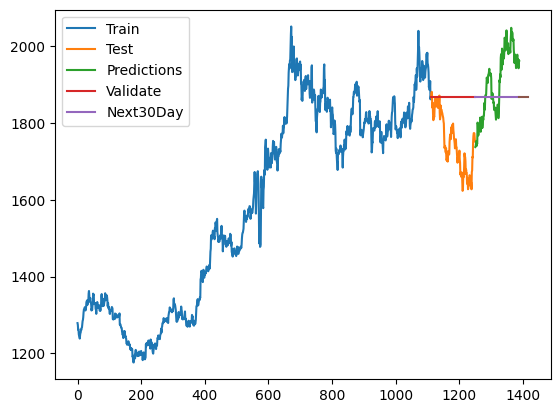

In [424]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

##Long short term memory (LSTM)

In [425]:
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

In [426]:
df1=df.reset_index()['Close']

In [427]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [428]:
#Split train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [429]:
#Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [430]:
#Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [431]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [432]:
#Define LSTM Model
# Define the model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100,1)))

# Add a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Add another 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add a bidirectional LSTM layer
model.add(Bidirectional(LSTM(100, activation='relu')))

# Add a dense output layer
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [433]:
# Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 7s 187ms/step - loss: 0.1161 - val_loss: 0.0206
Epoch 2/100
16/16 [==============================] - 2s 132ms/step - loss: 0.0140 - val_loss: 0.0317
Epoch 3/100
16/16 [==============================] - 2s 130ms/step - loss: 0.0074 - val_loss: 0.0177
Epoch 4/100
16/16 [==============================] - 2s 128ms/step - loss: 0.0049 - val_loss: 0.0136
Epoch 5/100
16/16 [==============================] - 2s 134ms/step - loss: 0.0038 - val_loss: 0.0093
Epoch 6/100
16/16 [==============================] - 3s 215ms/step - loss: 0.0029 - val_loss: 0.0053
Epoch 7/100
16/16 [==============================] - 2s 129ms/step - loss: 0.0023 - val_loss: 0.0047
Epoch 8/100
16/16 [==============================] - 2s 129ms/step - loss: 0.0022 - val_loss: 0.0046
Epoch 9/100
16/16 [==============================] - 2s 128ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 10/100
16/16 [==============================] - 2s 129ms/step - loss: 0.0019 - val_lo

In [434]:
#Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 13ms/step


In [435]:
#Normalization y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [436]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [437]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 18.41440322325987
Validation RMSE: 21.242908710608905
Testing MAE: 14.384694952713792
Validation MAE: 17.78626451994244
Testing MAPE: 0.008584383460975804
Validation MAPE: 0.008919338847030622


In [438]:
#Predict the next 7 days
x_input=val_data[39:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.88489074]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0

In [439]:
scaler.inverse_transform(lst_output)

array([[1950.74485486],
       [1949.4592337 ],
       [1933.84855196],
       [1928.05981342],
       [1919.48290161],
       [1914.25678535],
       [1911.18291849]])

In [440]:
#Predict the next 30 days
x_input=val_data[39:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.88489074]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0

In [441]:
scaler.inverse_transform(lst_output)

array([[1950.74485486],
       [1949.4592337 ],
       [1933.84855196],
       [1928.05981342],
       [1919.48290161],
       [1914.25678535],
       [1911.18291849],
       [1907.61613106],
       [1904.45211108],
       [1901.76645568],
       [1898.00897978],
       [1894.33581375],
       [1890.83231089],
       [1887.11339006],
       [1883.90178926],
       [1880.33510617],
       [1877.20718917],
       [1873.85415021],
       [1870.55234411],
       [1867.06099732],
       [1863.45304622],
       [1859.48865637],
       [1855.30430959],
       [1850.96016013],
       [1846.38937572],
       [1841.79250534],
       [1837.01225056],
       [1832.12707799],
       [1826.63081539],
       [1821.01320084]])

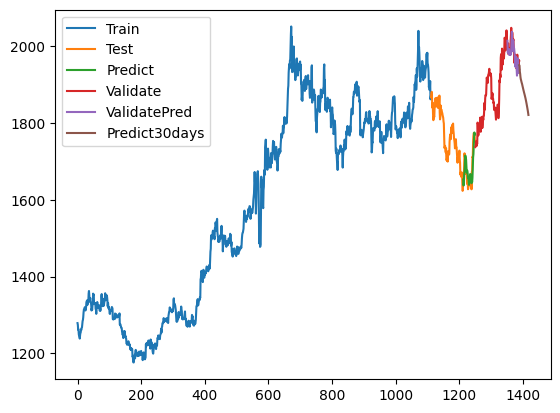

In [442]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Exponential Smoothing (ETS)

In [443]:
# 4. Split train test
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [444]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [445]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [446]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [447]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [448]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [449]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# 7. Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [450]:
y_pred = simple_exp.predict(test_data.index)

In [451]:
y_pred_val= simple_exp.predict(val_data.index)

In [452]:
#8. Predict next 7 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+7))
y_next_7_days = simple_exp.predict(fh)
y_next_7_days

array([[1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078]])

In [453]:
#9. Predict next 30 days
last_index =  data.index[-1]
fh = list(range(last_index,last_index+30))
y_next_30_days = simple_exp.predict(fh)
y_next_30_days

array([[1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078],
       [1868.66664078]])

In [454]:
# 10. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 140.2799435010349
Validation RMSE: 92.12777310499365
Testing MAE: 121.01700038174295
Validation MAE: 80.49041043971899
Testing MAPE: 0.07100828816465668
Validation MAPE: 0.04182595169434413


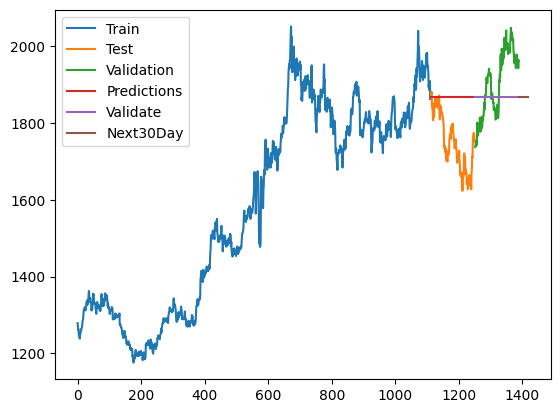

In [455]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Random Forest

In [456]:
from sklearn.ensemble import RandomForestRegressor

In [457]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [458]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [459]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [460]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [461]:
y_pred = model.predict(x_test)

In [462]:
y_pred_val =  model.predict(x_val)

In [463]:
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1889.87718104 1889.87718104 1889.87718104 1889.87718104 1889.87718104
 1889.87718104 1889.87718104 1889.87718104 1889.87718104 1889.87718104
 1889.87718104 1889.87718104 1889.87718104 1889.87718104 1889.87718104
 1889.87718104 1889.87718104 1889.87718104 1889.87718104 1889.87718104
 1889.87718104 1889.87718104 1889.87718104 1889.87718104 1889.87718104
 1889.87718104 1889.87718104 1889.87718104 1889.87718104 1889.87718104]


In [464]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 158.9005560052827
Validation RMSE: 86.23260582062018
Testing MAE: 141.92969850032375
Validation MAE: 77.23621178517001
Testing MAPE: 0.08300451022503492
Validation MAPE: 0.0405576961457247


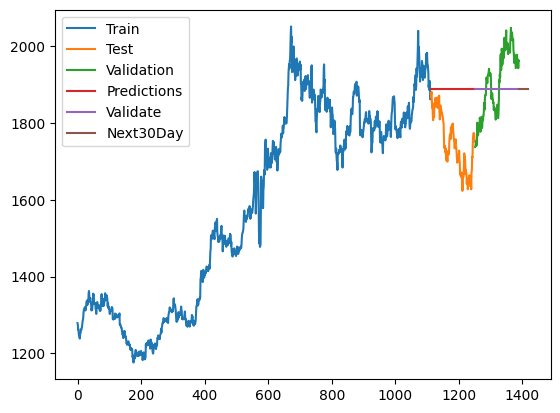

In [465]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Bayesian Neural Networks (BNN)

In [466]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [467]:
train_dates = train_data.index.values
test_dates = test_data.index.values
val_dates = val_data.index.values
train_close_prices = train_data['Close'].values
val_close_prices = val_data['Close'].values
test_close_prices = test_data['Close'].values

In [468]:
import torch
import torch.nn as nn

In [469]:
X_train = torch.from_numpy(train_dates.reshape(-1, 1)).float()
y_train = torch.from_numpy(train_close_prices.reshape(-1, 1)).float()
X_test = torch.from_numpy(test_dates.reshape(-1, 1)).float()
y_test = torch.from_numpy(test_close_prices.reshape(-1, 1)).float()
X_val = torch.from_numpy(val_dates.reshape(-1, 1)).float()
y_val = torch.from_numpy(val_close_prices.reshape(-1, 1)).float()

In [470]:
# Determining the architecture of a Bayesian Neural Network.
class BNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(BNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [471]:
# Determining the loss function and optimization algorithm.
criterion = nn.MSELoss()
learning_rate = 0.001
num_epochs = 1000

In [472]:
# Built model BNN
model = BNN(input_size=1, output_size=1)

In [473]:
# Train model BNN
for epoch in range(num_epochs):
    model.train()

    # Tính đầu ra dự đoán của mô hình
    y_pred = model(X_train)

    # Tính lỗi dự đoán so với giá thực tế
    loss = criterion(y_pred, y_train)

    # Backpropagation và cập nhật trọng số
    loss.backward()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 1171660.625
Epoch [200/1000], Loss: 1395275.5
Epoch [300/1000], Loss: 464435.34375
Epoch [400/1000], Loss: 1136018.875
Epoch [500/1000], Loss: 486070.4375
Epoch [600/1000], Loss: 714962.1875
Epoch [700/1000], Loss: 423455.03125
Epoch [800/1000], Loss: 589241.25
Epoch [900/1000], Loss: 689188.125
Epoch [1000/1000], Loss: 438427.28125


In [474]:
# Test
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)

In [475]:
# Validation
model.eval()
with torch.no_grad():
    y_pred_val = model(X_val)

In [476]:
y_test = np.array(test_data['Close'])
y_val = np.array(val_data['Close'])

In [477]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = torch.sqrt(torch.mean((y_pred_test - y_test)**2))
valid_rmse = torch.sqrt(torch.mean((y_pred_val - y_val)**2))
#test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse.item())
print('Validation RMSE:', valid_rmse.item())

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred_test)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 1548.8372759173922
Validation RMSE: 1778.687728689662
Testing MAE: 1543.1687266397819
Validation MAE: 1773.153472241738
Testing MAPE: 0.8880931772513271
Validation MAPE: 0.9329398448054987


In [478]:
# Predict the next 7 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

x_next_7_days = torch.from_numpy(np.array(range(last_index+1, last_index+8)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_7_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_7_days)):
    print(f'{y_pred_next[i]}')

3871.6484375
3874.42626953125
3877.20361328125
3879.981689453125
3882.759033203125
3885.53662109375
3888.314453125


In [479]:
# Predict the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = torch.from_numpy(np.array(range(last_index+1, last_index+31)).reshape(-1, 1)).float()

model.eval()
with torch.no_grad():
    y_pred_next = model(x_next_30_days)

# Chuyển đổi kết quả dự đoán thành mảng numpy
y_pred_next = y_pred_next.numpy().flatten()

# Hiển thị kết quả dự đoán
for i in range(len(x_next_30_days)):
    print(f'{y_pred_next[i]}')

3871.6484375
3874.42626953125
3877.20361328125
3879.981689453125
3882.759033203125
3885.53662109375
3888.314453125
3891.09228515625
3893.8701171875
3896.6474609375
3899.42529296875
3902.20263671875
3904.980712890625
3907.758056640625
3910.53515625
3913.31396484375
3916.09130859375
3918.86865234375
3921.646240234375
3924.42431640625
3927.20166015625
3929.9794921875
3932.75732421875
3935.53466796875
3938.312255859375
3941.090087890625
3943.8681640625
3946.645751953125
3949.423095703125
3952.20068359375


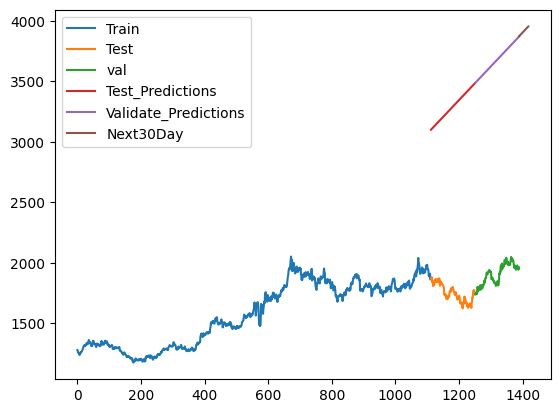

In [480]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data, y_pred_next)
plt.legend(['Train', 'Test','val', 'Test_Predictions','Validate_Predictions','Next30Day'])
plt.show()

## Gaussian Process Regression (GPR)

In [481]:
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [482]:
# Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [483]:
# Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [484]:
# Choose best kernel
kernels = [RBF(), Matern(), RationalQuadratic(), ExpSineSquared(), DotProduct()]
param_grid = {'kernel': kernels}

gpr = GaussianProcessRegressor()
grid_search = GridSearchCV(gpr, param_grid, cv=KFold(n_splits=5))

grid_search.fit(x_train, y_train)


print("Best Kernel:", grid_search.best_estimator_.kernel)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter periodicity is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_

Best Kernel: RationalQuadratic(alpha=1, length_scale=1)
Best Score: -3.4588035905562924


In [485]:
# Built model GPR
kernel = RationalQuadratic(alpha=1, length_scale=1)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

In [486]:
gpr.fit(x_train, y_train)

GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1),
                         random_state=42)

In [487]:
y_pred = gpr.predict(x_test)

In [488]:
y_pred_val =  gpr.predict(x_val)

In [489]:
# 12. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
valid_mae = mean_absolute_error(y_val, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 53.665454161985224
Validation RMSE: 323.8980133735865
Testing MAE: 41.62623583773805
Validation MAE: 306.95888891276525
Testing MAPE: 0.023444055271171566
Validation MAPE: 0.1590931744514168


In [490]:
# Predict the next 7 days
last_index =  data.index[-1]
# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = gpr.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[1563.73135898 1563.32972255 1562.92931353 1562.53012446 1562.13214794
 1561.73537666 1561.33980335]


In [491]:
# Predict the next 30 days
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = gpr.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1563.73135898 1563.32972255 1562.92931353 1562.53012446 1562.13214794
 1561.73537666 1561.33980335 1560.94542084 1560.55222199 1560.16019976
 1559.76934716 1559.37965726 1558.9911232  1558.60373818 1558.21749546
 1557.83238836 1557.44841026 1557.06555461 1556.68381491 1556.30318472
 1555.92365765 1555.54522738 1555.16788763 1554.79163218 1554.41645489
 1554.04234963 1553.66931035 1553.29733105 1552.92640579 1552.55652865]


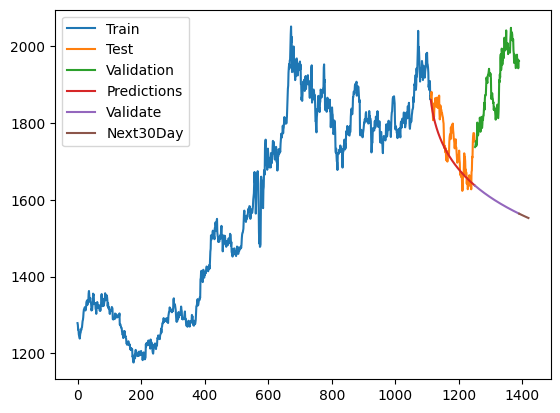

In [492]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## Recurrent Neural Network (RNN)

In [493]:
df1=df.reset_index()['Close']

In [494]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [495]:
# Split train test
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [496]:
# Function Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [497]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [498]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [499]:
from keras.layers import Dense, SimpleRNN

In [500]:
# 8. Define RNN Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [501]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 2s 59ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 2/100
16/16 [==============================] - 1s 39ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 3/100
16/16 [==============================] - 0s 26ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 4/100
16/16 [==============================] - 0s 22ms/step - loss: 9.8625e-04 - val_loss: 0.0011
Epoch 5/100
16/16 [==============================] - 0s 22ms/step - loss: 7.4819e-04 - val_loss: 0.0010
Epoch 6/100
16/16 [==============================] - 0s 22ms/step - loss: 7.2343e-04 - val_loss: 9.8671e-04
Epoch 7/100
16/16 [==============================] - 0s 23ms/step - loss: 6.9594e-04 - val_loss: 9.3451e-04
Epoch 8/100
16/16 [==============================] - 0s 22ms/step - loss: 6.5463e-04 - val_loss: 0.0010
Epoch 9/100
16/16 [==============================] - 0s 22ms/step - loss: 9.4446e-04 - val_loss: 0.0013
Epoch 10/100
16/16 [==============================] - 0s 23ms/step -

In [502]:
# Test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 16ms/step


In [503]:
# Chuẩn hóa dữ liệu y_pred, y_pred_val
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [504]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [505]:
# Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))

print('Testing RMSE:', test_rmse)
print('Validation RMSE:', valid_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
valid_mae = mean_absolute_error(yval, y_pred_val)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
valid_mape = mean_absolute_percentage_error(yval, y_pred_val)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Testing RMSE: 18.31881047650816
Validation RMSE: 18.397275732552487
Testing MAE: 13.47809801603616
Validation MAE: 15.346554404810874
Testing MAPE: 0.00802423536330474
Validation MAPE: 0.0076968371359535485


In [506]:
# Predict the next 7 days
x_input=val_data[39:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.88943815]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0

In [507]:
scaler.inverse_transform(lst_output)

array([[1954.72520932],
       [1947.76896691],
       [1937.45733781],
       [1929.82640777],
       [1925.21049463],
       [1919.62136596],
       [1915.51506841]])

In [508]:
# Predict the next 30 days
x_input=val_data[39:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.88943815]
101
1 day input [0.85216495 0.85707761 0.85787728 0.8656461  0.87398601 0.86016221
 0.85959098 0.85307898 0.86061922 0.85867709 0.84553874 0.78453106
 0.78830111 0.79458467 0.80109681 0.78830111 0.78441684 0.77196394
 0.77436309 0.75174222 0.7606535  0.75882559 0.75037132 0.74922885
 0.73323433 0.72272371 0.73209187 0.74568724 0.75574085 0.75094255
 0.7671655  0.76739408 0.72855025 0.72717921 0.74614425 0.78350281
 0.84028328 0.83399972 0.85730605 0.84862334 0.90666063 0.9173997
 0.87033018 0.88038393 0.9340798  0.92071287 0.88678171 0.90963102
 0.90243343 0.91865652 0.90574661 0.92276937 0.96652571 0.96504059
 0.9547584  0.92871013 0.94664692 0.95361593 0.98834691 0.9436764
 0.93453668 0.9496173  0.93567914 0.94984574 0.91774249 0.92871013
 0.93430824 0.92482572 0.92962416 0.9298526  0.92219814 0.95750034
 0.97383751 0.99600137 0.96104196 0.97120993 0.98252022 0.97600823
 0.95795722 0.95772878 0.96172741 0.92791046 0.9191134  0.89146579
 0.91682846 0.91237296 0.90963102 0

In [509]:
scaler.inverse_transform(lst_output)

array([[1954.72520932],
       [1947.76896691],
       [1937.45733781],
       [1929.82640777],
       [1925.21049463],
       [1919.62136596],
       [1915.51506841],
       [1907.96735262],
       [1904.10814142],
       [1898.11134115],
       [1891.20361865],
       [1884.37952779],
       [1875.35633713],
       [1873.5675697 ],
       [1867.09120488],
       [1858.49874582],
       [1851.44238544],
       [1847.19600621],
       [1843.56504729],
       [1841.4042417 ],
       [1836.89068992],
       [1832.96871586],
       [1827.79821491],
       [1827.93652274],
       [1823.59743396],
       [1819.79404674],
       [1819.90006014],
       [1815.64095096],
       [1813.07023037],
       [1809.85043857]])

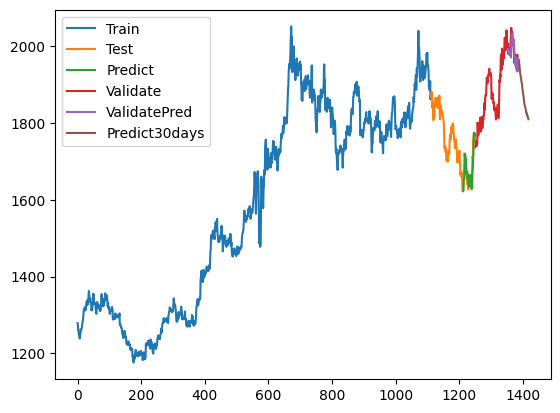

In [510]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()